# Enlace de presentación

https://www.canva.com/design/DAGtPvO6v28/QFJzhoUDIbQiBOIjEWC4ZA/edit?utm_content=DAGtPvO6v28&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

# Librerías importadas

In [50]:
#Librerías básicas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import heapq

# Sampler para balanceo
from imblearn.over_sampling import RandomOverSampler

#Preparación de datos y configuración de pipeline para ML con scikit-learn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

#Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

#Metricas
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from yellowbrick.regressor import ResidualsPlot, PredictionError
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


# Importar el Dataset

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
jobs_market = pd.read_csv('/content/drive/MyDrive/DataSets/ai_job_dataset1.csv')
jobs_market

,job_id,job_title,salary_usd,salary_currency,salary_local,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,Data Scientist,219728,USD,219728,EX,PT,Sweden,M,Sweden,0,"Python, Computer Vision, R, Docker",Associate,13,Transportation,2024-09-23,2024-10-31,1132,6.6,TechCorp Inc
1,AI00002,Head of AI,230237,JPY,25326070,EX,PT,Japan,L,Japan,50,"Kubernetes, MLOps, Tableau, Python",Bachelor,10,Transportation,2024-07-26,2024-09-12,2299,8.5,Cloud AI Solutions
2,AI00003,Data Engineer,128890,EUR,109557,EX,CT,Germany,S,Germany,100,"Spark, Scala, Hadoop, PyTorch, GCP",Bachelor,12,Automotive,2025-01-19,2025-03-28,1329,5.5,Quantum Computing Inc
3,AI00004,Computer Vision Engineer,96349,USD,96349,MI,FL,Finland,L,Finland,50,"MLOps, Linux, Tableau, Python",PhD,2,Automotive,2024-07-20,2024-09-06,1132,6.8,Cognitive Computing
4,AI00005,Robotics Engineer,63065,EUR,53605,EN,FT,France,S,France,100,"R, Scala, SQL, GCP, Python",Associate,0,Finance,2025-03-16,2025-05-09,2011,9.3,Advanced Robotics
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,AI14996,AI Product Manager,39171,USD,39171,MI,CT,China,M,China,50,"Azure, R, NLP, Docker, Computer Vision",PhD,4,Consulting,2025-01-07,2025-02-07,1107,5.2,Smart Analytics
14996,AI14997,AI Product Manager,77555,EUR,65922,EN,CT,Netherlands,M,Netherlands,50,"Python, TensorFlow, Mathematics, AWS, Computer...",PhD,0,Energy,2024-12-22,2025-02-12,1870,9.7,Autonomous Tech
14997,AI14998,Data Engineer,28380,USD,28380,EN,FL,India,M,India,50,"Azure, Kubernetes, Spark, Statistics, MLOps",Associate,1,Government,2024-05-04,2024-05-21,1558,9.0,Digital Transformation LLC
14998,AI14999,AI Specialist,58764,EUR,49949,EN,PT,France,M,France,100,"MLOps, Statistics, Data Visualization, R, Python",Master,0,Real Estate,2024-05-08,2024-06-22,546,8.4,Machine Intelligence Group


## **El dataset tiene datos preparados sintéticamente**

Los datos son generados artificialmente por algoritmos, pero están diseñados para imitar las propiedades estadísticas y los patrones de datos del mundo real.

Según el autor:
"This dataset was synthetically generated using AI language models by Bisma Sajjad and does not represent real-world data. The content may contain factual inaccuracies, inconsistencies, or inherent biases from the AI model's training data".

Vamos a trabajar sobre la copia del dataset siempre

In [53]:
jobs_market_copy = jobs_market.copy()

# Verificación y calidad de datos

In [54]:
jobs_market_copy.info()


#Vemos que existen tres tipos de datos, float, int y object. A los que más adelante se
# deben hacer converisones de tipos de datos para poder trabajar con ellos. Como las fechas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   salary_local            15000 non-null  int64  
 5   experience_level        15000 non-null  object 
 6   employment_type         15000 non-null  object 
 7   company_location        15000 non-null  object 
 8   company_size            15000 non-null  object 
 9   employee_residence      15000 non-null  object 
 10  remote_ratio            15000 non-null  int64  
 11  required_skills         15000 non-null  object 
 12  education_required      15000 non-null  object 
 13  years_experience        15000 non-null  int64  
 14  industry                15000 non-null

In [55]:
jobs_market_copy.isnull().sum()

#No existen valores nulos

,0
job_id,0
job_title,0
salary_usd,0
salary_currency,0
salary_local,0
experience_level,0
employment_type,0
company_location,0
company_size,0
employee_residence,0


In [56]:
jobs_market_copy.duplicated().sum()

#No existen valores duplicados

np.int64(0)

In [57]:
round(jobs_market.describe(), 3)

,salary_usd,salary_local,remote_ratio,years_experience,job_description_length,benefits_score
count,15000.000,1.500000e+04,15000.000,15000.000,15000.000,15000.000
mean,121991.938,8.292366e+05,50.197,6.366,1500.853,7.500
std,63968.362,3.425325e+06,40.844,5.599,574.725,1.444
min,16621.000,1.662100e+04,0.000,0.000,500.000,5.000
25%,74978.500,7.383075e+04,0.000,2.000,998.750,6.300
50%,107261.500,1.090355e+05,50.000,5.000,1512.000,7.500
75%,155752.250,1.673278e+05,100.000,10.000,1994.000,8.800
max,410273.000,3.368541e+07,100.000,19.000,2499.000,10.000


Es importante entender que variables como years_experience y remote_ratio se permiten tener valores 0 (que no nulos)
 pues existen trabajos que no requieren experiencia para aplicar (years_experience) y la proporcion de que los trabajos sean
 remotos también puede ser 0

Entendiendo esto, podemos interpretar con seguridad que no hay datos atípicos que requieran ser corregidos con alguna técnica
 de imputación de datos
El dataset en general tiene una calidad de datos adecuada para comenzar a trabajar sobre estos mismos.
Las columnas están bien nombradas con datos ,al parecer, sin ninún error tipogáfico y sin valores aparentes nulos, por lo
 que tampoco se requiere de una limpieza de los datos

# Feature analysis

In [58]:
jobs_market_copy.columns

Index(['job_id', 'job_title', 'salary_usd', 'salary_currency', 'salary_local',
       'experience_level', 'employment_type', 'company_location',
       'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
       'education_required', 'years_experience', 'industry', 'posting_date',
       'application_deadline', 'job_description_length', 'benefits_score',
       'company_name'],
      dtype='object')

In [59]:
jobs_market_copy['job_title'].unique()

array(['Data Scientist', 'Head of AI', 'Data Engineer',
       'Computer Vision Engineer', 'Robotics Engineer', 'AI Consultant',
       'Machine Learning Engineer', 'Deep Learning Engineer',
       'Principal Data Scientist', 'AI Product Manager',
       'Machine Learning Researcher', 'AI Software Engineer',
       'ML Ops Engineer', 'AI Architect', 'AI Specialist', 'Data Analyst',
       'Research Scientist', 'Autonomous Systems Engineer',
       'NLP Engineer', 'AI Research Scientist'], dtype=object)

In [60]:
#Promedio salarial anual en dólares por trabajo
#Ordenado por 'job_title'

mean_per_job_title = jobs_market_copy.groupby('job_title')['salary_usd'].mean().sort_values(ascending=False)
round(mean_per_job_title, 3)

,salary_usd
job_title,
Data Engineer,127533.766
AI Product Manager,126029.675
Deep Learning Engineer,124395.492
ML Ops Engineer,123466.610
NLP Engineer,122867.780
Data Scientist,122846.246
Machine Learning Researcher,122553.722
Machine Learning Engineer,122516.212
Research Scientist,122298.949


# EDA

In [61]:
#Para comprender mejor la tabla hacemos una búsqueda del registro con el mayor salario registrado anual en dolares

jobs_market_copy[jobs_market_copy["salary_usd"] == 410273].T.style.set_table_styles([{'selector': 'th', 'props': [('background', '#8973f5'), ('color', 'black'), ('font-family', 'verdana')]},
                                             {'selector': 'td', 'props': [('font-family', 'verdana')]},
                                             ])

#Este aplicativo fue publicado por la compañia suiza Machine Intelligence Group, ofreciendo un salario anual de 369,246 CHF (francos suizos)
# que son 410mil dolares anuales aproximadamente. El cargo necesitado era como Head of AI. Como era un puesto importante para
# una empresa grande también tenia requerimientos exigentes, pidiendo al menos 19 años de experiencia en el sector.

#Dentro de las skills requeridas solo estaban especificadas el manejo de Python, TensorFlow, Deep Learning

,6171
job_id,AI06172
job_title,Head of AI
salary_usd,410273
salary_currency,CHF
salary_local,369246
experience_level,EX
employment_type,FT
company_location,Switzerland
company_size,L
employee_residence,Switzerland


## **Análisis específico y de distribuciones**

### Histograma salario

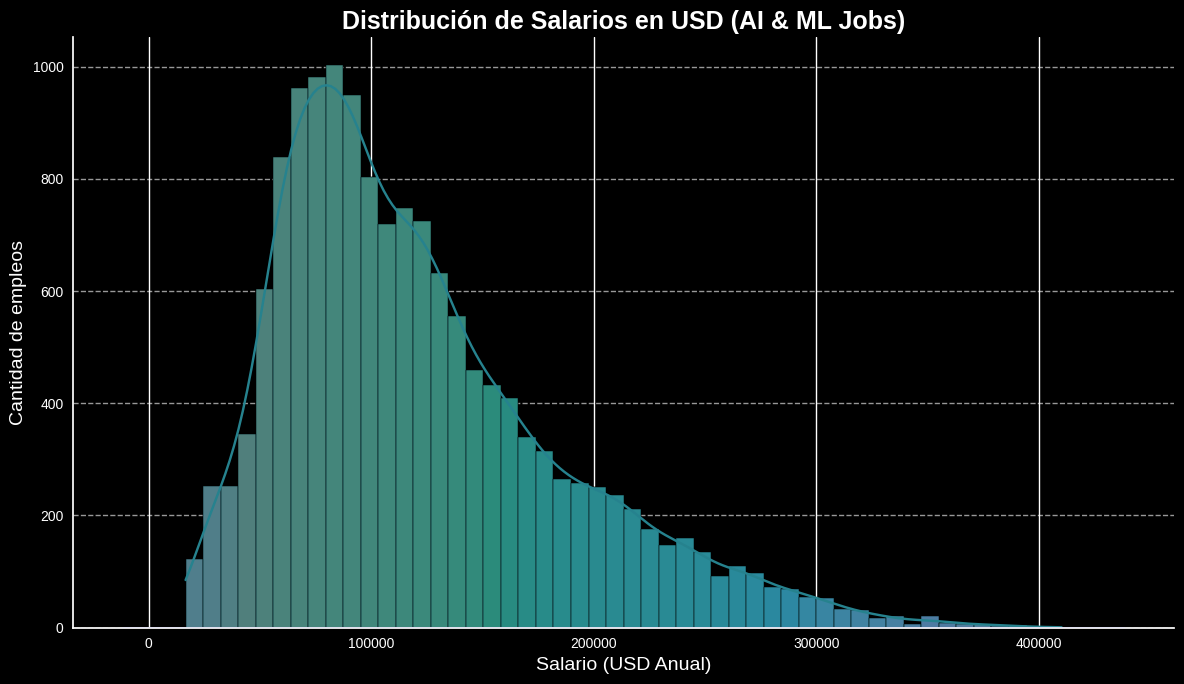

In [62]:
#Histograma del salario

counts, bins = np.histogram(jobs_market['salary_usd'], bins=50)
colors = sns.color_palette('husl', len(bins)-1)
plt.figure(figsize=(12, 7))
for i in range(len(bins)-1):
    plt.bar(
        bins[i],
        counts[i],
        width=(bins[1]-bins[0]),
        color=colors[i],
        align='edge',
        edgecolor='black'
    )
sns.histplot(
    data=jobs_market,
    x='salary_usd',
    bins=50,
    kde=True,
    color=sns.color_palette('viridis', 8)[3],
    edgecolor='black',
    alpha=0.8,
)
sns.kdeplot(
    data=jobs_market,
    x='salary_usd',
    color='darkblue',
    linewidth=2,
)
plt.title('Distribución de Salarios en USD (AI & ML Jobs)', fontsize=18, fontweight='bold')
plt.xlabel('Salario (USD Anual)', fontsize=14)
plt.ylabel('Cantidad de empleos', fontsize=14)


# Agregar grid

plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.style.use('dark_background')
plt.show()


#Vemos que los salarios en su mayoría están entre los 50mil y 200mil dólares anuales
#De esto surge la duda si el salario se relaciona con:
#   - El tamaño de la compañía
#   - Si se puede trabajar remoto o no
#   - Educación requerida
#   - Nivel de experiencia

<Axes: xlabel='salary_usd'>

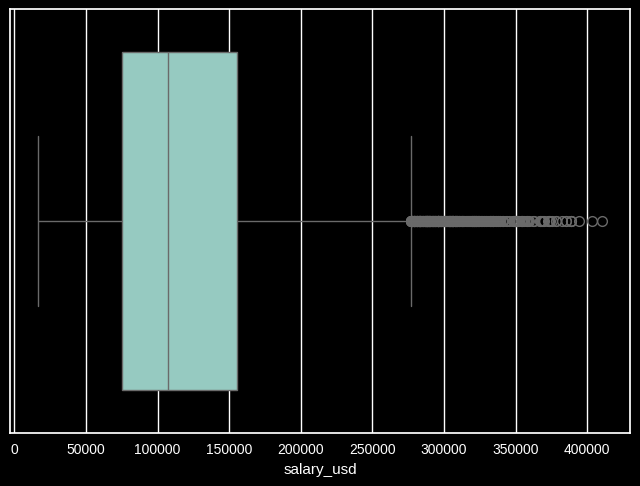

In [63]:
sns.boxplot(data=jobs_market, x='salary_usd')

In [64]:
# 'job_id', 'job_title', 'salary_usd', 'salary_currency', 'salary_local',
#        'experience_level', 'employment_type', 'company_location',
#        'company_size', 'employee_residence', 'remote_ratio', 'required_skills',
#        'education_required', 'years_experience', 'industry', 'posting_date',
#        'application_deadline', 'job_description_length', 'benefits_score',
#        'company_name'],
#       dtype='object')

In [65]:
jobs_market_copy['company_name'].unique()

array(['TechCorp Inc', 'Cloud AI Solutions', 'Quantum Computing Inc',
       'Cognitive Computing', 'Advanced Robotics', 'AI Innovations',
       'DataVision Ltd', 'DeepTech Ventures',
       'Machine Intelligence Group', 'Autonomous Tech',
       'Predictive Systems', 'Neural Networks Co', 'Future Systems',
       'Smart Analytics', 'Algorithmic Solutions',
       'Digital Transformation LLC'], dtype=object)

### 5 Compañías con mejores ofertas salariales

In [66]:
# Las compañías con mayores ofertas salariales

mean_salary_per_company = jobs_market_copy.groupby('company_name')['salary_usd'].mean().sort_values(ascending=False)
print("Las compañías con mejores ofertas salariales en USD:")
print(round(mean_salary_per_company, 2))

Las compañías con mejores ofertas salariales en USD:
company_name
Autonomous Tech               125450.36
Digital Transformation LLC    124774.63
Cognitive Computing           124607.39
Neural Networks Co            124491.01
Machine Intelligence Group    123796.69
Cloud AI Solutions            122480.41
AI Innovations                122188.47
Future Systems                122131.48
Smart Analytics               122112.06
Algorithmic Solutions         121445.02
DeepTech Ventures             121129.96
TechCorp Inc                  120617.66
Quantum Computing Inc         120350.94
Predictive Systems            119817.10
DataVision Ltd                118318.22
Advanced Robotics             118307.46
Name: salary_usd, dtype: float64


In [67]:
top_companies_salaries = mean_salary_per_company.head().reset_index()

fig = px.bar(top_companies_salaries,
             x='company_name',
             y='salary_usd',
             text_auto='.4s',
             title='Top 5 Empresas con Mejores Salarios en USD',
             labels={'company_name': 'Nombre de la Empresa', 'salary_usd': 'Salario Promedio (USD)'},
            template = 'plotly_dark',
             color='company_name') # This will color each bar differently

fig.update_layout(xaxis_tickangle=-45)
fig.show()


# Autonomous Tech               : Telecommunicaciones
# Digital Transformation LLC    : Educación
# Cognitive Computing           : Industria automotriz
# Neural Networks Co            : Energía
# Machine Intelligence Group    : Gobierno

***Industria a la que pertenece cada empresa***


In [68]:
print("\nIndustria a la que pertenece cada empresa:")
for company_name in jobs_market_copy['company_name'].unique():
    industry = jobs_market_copy[jobs_market_copy['company_name'] == company_name]['industry'].iloc[0]
    print(f"{company_name}: {industry}")


Industria a la que pertenece cada empresa:
TechCorp Inc: Transportation
Cloud AI Solutions: Transportation
Quantum Computing Inc: Automotive
Cognitive Computing: Automotive
Advanced Robotics: Finance
AI Innovations: Gaming
DataVision Ltd: Government
DeepTech Ventures: Government
Machine Intelligence Group: Government
Autonomous Tech: Telecommunications
Predictive Systems: Gaming
Neural Networks Co: Energy
Future Systems: Media
Smart Analytics: Finance
Algorithmic Solutions: Energy
Digital Transformation LLC: Education


### Industrias con salarios más altos

In [69]:
# Las industrias con mejores ofertas salariales

mean_salary_per_industry = jobs_market_copy.groupby('industry')['salary_usd'].max().sort_values(ascending=False)
print("Las industrias con mejores ofertas salariales en USD:")
print(round(mean_salary_per_industry, 2))

Las industrias con mejores ofertas salariales en USD:
industry
Education             410273
Gaming                403493
Finance               394510
Transportation        388535
Real Estate           385410
Retail                385250
Government            382222
Consulting            378502
Automotive            375327
Media                 374078
Technology            373536
Energy                368934
Telecommunications    358613
Healthcare            350058
Manufacturing         343823
Name: salary_usd, dtype: int64


In [70]:
top_industries_salaries = mean_salary_per_industry.reset_index()

fig = px.bar(top_industries_salaries,
             x='industry',
             y='salary_usd',
             text_auto='.3s',
             title='Industrias con Mejores Salarios en USD',
             template = 'plotly_dark',
             labels={'industry': 'Industria', 'salary_usd': 'Salarios máximos (USD)'},
             color='industry')

fig.update_layout(xaxis_tickangle=-45)
fig.show()


# Nota: La industria tecnológica es una de las que ofrece salarios más bajos en puestos de trabajo relacionados con la IA y el ML en comparación al resto de industrias

### Salario por tamaño de compañía

In [71]:
fig = px.box(jobs_market_copy,
             x='company_size',
             y='salary_usd',
             title='Salario por Tamaño de la Compañía',
             labels={'company_size': 'Tamaño de la Compañía', 'salary_usd': 'Salario (USD)'},
             template = 'plotly_dark',
             color='company_size')
fig.show()

### Distribución de salarios por países

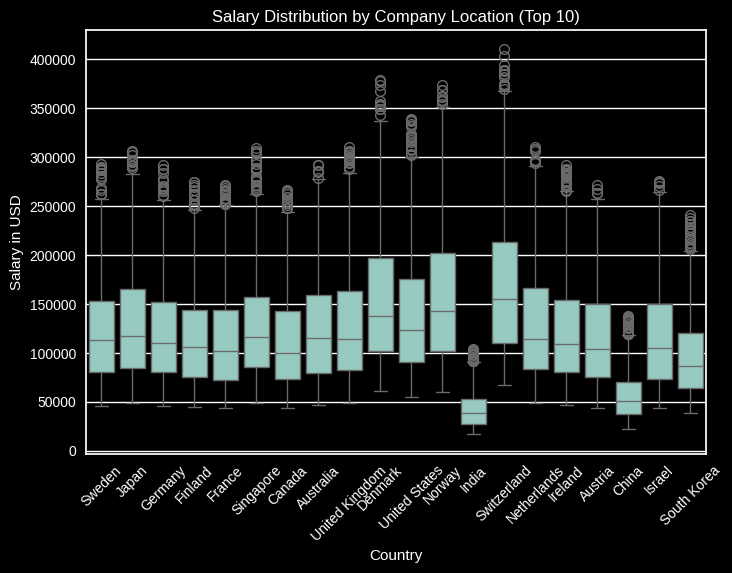

In [72]:
# Salarios por los top 10 países

top_countries = jobs_market_copy['company_location'].value_counts().nlargest(20).index #Tomamos los 10 países con más registros de trabajos
sns.boxplot(data=jobs_market_copy[jobs_market_copy['company_location'].isin(top_countries)],
            x='company_location', y='salary_usd')
plt.title('Salary Distribution by Company Location (Top 10)')
plt.xlabel('Country')
plt.ylabel('Salary in USD')
plt.xticks(rotation=45)
plt.style.use('dark_background')
plt.show()

### Skills más buscadas

/tmp/ipython-input-73-431777423.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




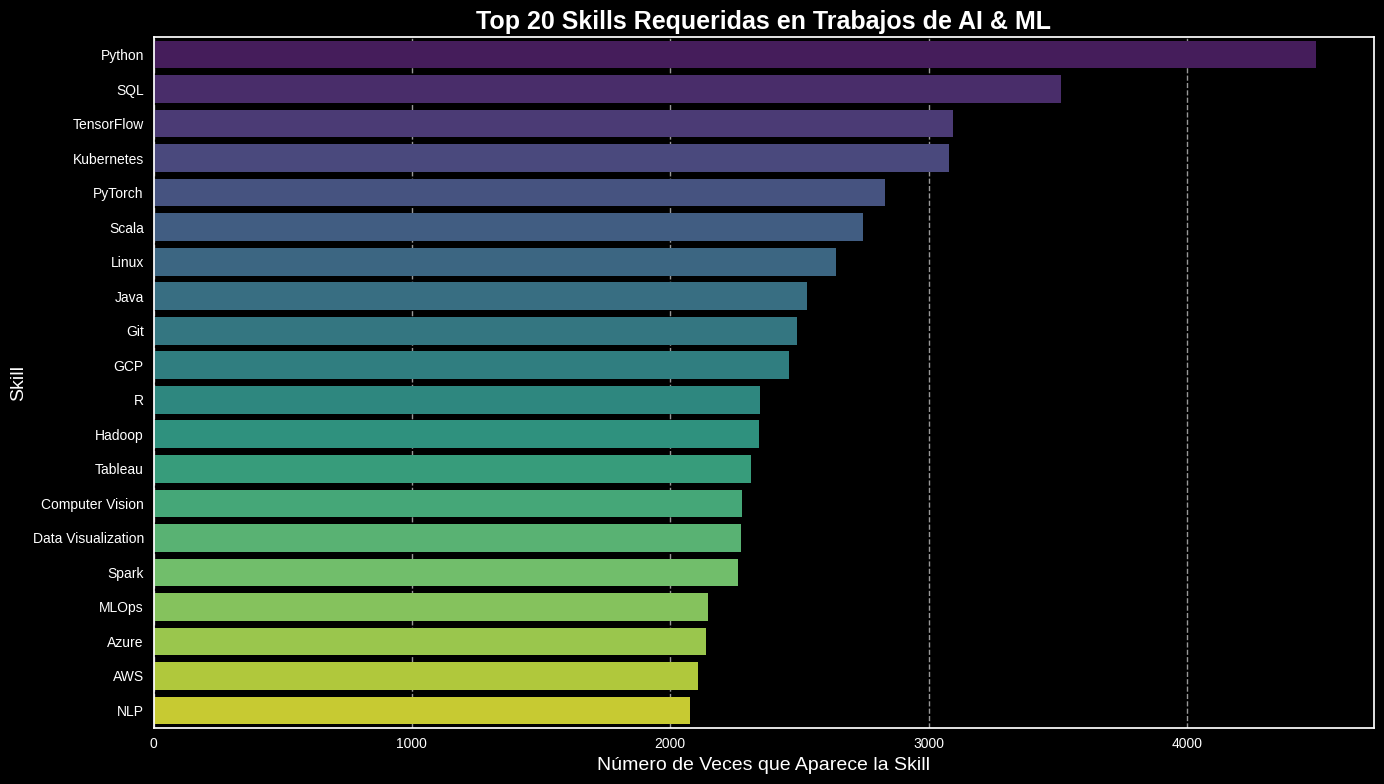

In [73]:
# Extraer todas las skills y contarlas
all_skills = jobs_market_copy['required_skills'].str.split(', ').explode().str.strip()
skill_counts = all_skills.value_counts()

# Obtener las 20 skills más comunes
top_20_skills = skill_counts.head(20)

plt.figure(figsize=(14, 8))
sns.barplot(x=top_20_skills.values, y=top_20_skills.index, palette='viridis')
plt.title('Top 20 Skills Requeridas en Trabajos de AI & ML', fontsize=18, fontweight='bold')
plt.xlabel('Número de Veces que Aparece la Skill', fontsize=14)
plt.ylabel('Skill', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.style.use('dark_background')
plt.show()

### Tendencias de publicaciones sobre el tiempo

/tmp/ipython-input-74-3957507151.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



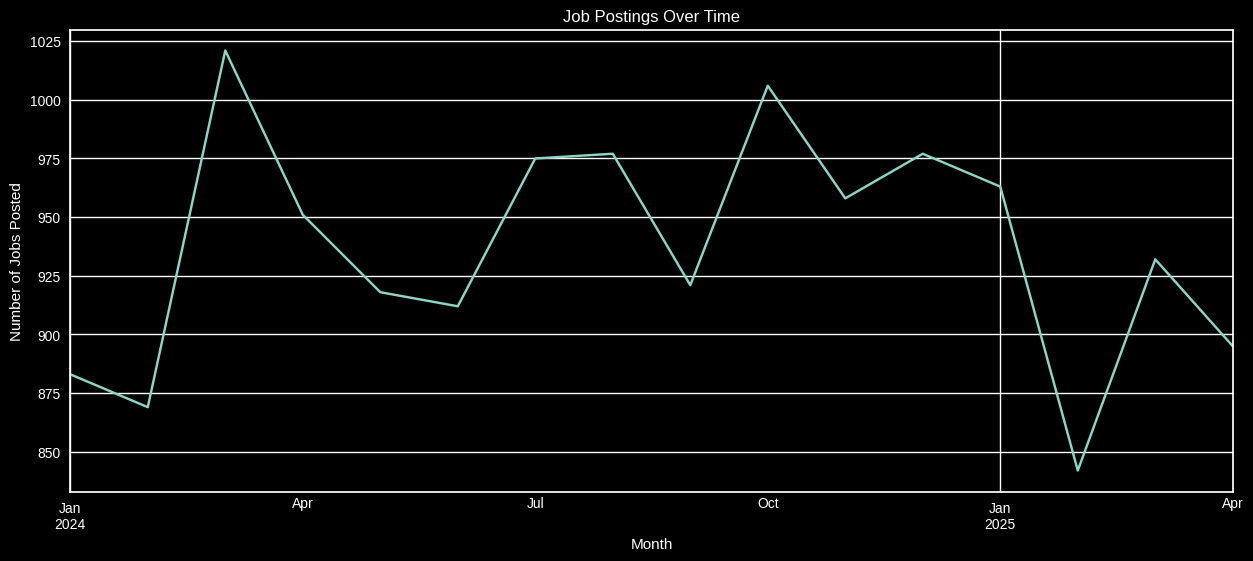

In [74]:
jobs_market_copy['posting_date'] = pd.to_datetime(jobs_market_copy['posting_date']) #Convertir a datetime para analizar como fecha
#Resamplea el dataframe por meses basado en la columna de fecha y luego cuenta los trabajos
monthly_postings = jobs_market_copy.resample('M', on='posting_date')['job_id'].count()

plt.figure(figsize=(15, 6))
monthly_postings.plot()
plt.title('Job Postings Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Jobs Posted')
plt.grid(True)
plt.style.use('dark_background')
plt.show()

In [75]:
#Media salarial con respecto al nivel de experiencia sobre el tiempo

experience_time = jobs_market_copy.groupby(['posting_date', 'experience_level'])['salary_usd'].mean().reset_index()
experience_time['experience_level'] = experience_time['experience_level'].replace({
    'EN': 'Entry-level', 'MI': 'Mid-level', 'SE': 'Senior', 'EX': 'Executive'
})


fig = px.line(experience_time, x='posting_date', y='salary_usd', color='experience_level',
             title='Salary Trends by Experience Level (2024-2025)',
             labels={'salary_usd': 'Average Salary (USD)', 'posting_date': 'Date'},
             template='plotly_dark')

fig.update_layout(width=1000, height=500, hovermode='x unified')
fig.show()

## F**eature engenieering**

In [76]:
#Para trabajar el análisis multivariado trabajaremos sobre otra copia del dataset

jobs_market_AM = jobs_market_copy.copy()

### Cuantificación de variables

In [77]:
#Estamos ante varias variables categóricas pero que podemos cuantificar de diferentes formas, como la educación
# mínima, el tamaño de la compañía o el nivel de experiencia.

#Usamos el mapeo para darle peso a los features categoricos en orden de menor a mayor
# o de menor a mayor prioridad


# Nivel de educación
jobs_market_AM['education_required_num'] = jobs_market_AM['education_required'].map({
    'Associate': 1, 'Bachelor': 2, 'Master': 3, 'PhD': 4
})


# Tamaño de la compañia
jobs_market_AM['company_size_num'] = jobs_market_AM['company_size'].map({
    'S': 1, 'M': 2, 'L': 3
})


# Nivel de experiencia requerido
jobs_market_AM['experience_level_num'] = jobs_market_AM['experience_level'].map({
    'EN': 1, 'MI': 2, 'SE': 3, 'EX': 4
})

### Agrupación por trabajos

In [78]:
#En nuestro caso, no deberíamos tomar la variable job_title como target, por lo que no consideramos neceario
# tomar específicamente cada uno de los puestos, por lo que es mejor si clasificamos por grupos y analizarlos
# a partir del salario

#Para hacer una agrupación de este estilo vamos a usar un diccionario que nos permita clasificar en grupos cada trabajo

job_categories_market = {
    'Data Scientist': 'Data Scientist',
    'Head of AI': 'Leadership',
    'Data Engineer': 'Data Engineer',
    'Computer Vision Engineer': 'ML Engineer',
    'Robotics Engineer': 'Robotics/Autonomous',
    'AI Consultant':'AI Specialist',
    'Machine Learning Engineer': 'ML Engineer',
    'Deep Learning Engineer': 'ML Engineer',
    'Principal Data Scientist': 'Data Scientist',
    'AI Product Manager': 'Product Manager',
    'Machine Learning Researcher': 'AI Researcher',
    'AI Software Engineer': 'AI Engineer',
    'ML Ops Engineer': 'ML Engineer',
    'AI Architect': 'AI Architect',
    'AI Specialist': 'AI Specialist',
    'Data Analyst': 'Data Analyst',
    'Research Scientist': 'AI Researcher',
    'Autonomous Systems Engineer': 'Robotics/Autonomous',
    'NLP Engineer': 'ML Engineer',
    'AI Research Scientist': 'AI Researcher'
}
# Aplicamos un mapeo por categorías
# Definimos una nueva columna llamada job_group en la que vamos a almacenar la clasificación de las categorías aplicando un mapeo

jobs_market_AM['job_group'] = jobs_market_AM['job_title'].map(job_categories_market)

In [79]:
columns_to_drop = [
    'job_id', # Identificador único, no aporta valor predictivo
    'salary_currency', # Ya tenemos 'salary_usd' que es el salario unificado
    'salary_local', # Salario en moneda local, 'salary_usd' es más útil para comparación global
    'company_name', # Aunque analizamos las top companies, el nombre específico no es útil para un modelo general.
    'posting_date', # Si no estamos haciendo un análisis temporal, la fecha exacta de publicación puede no ser necesaria.
    'application_deadline',
    'job_description_length',
    'employee_residence', #En realidad nos importa la locació de la compañia y no del empleado
    'required_skills', # Esta columna es categórica con muchas categorías y requiere un procesamiento complejo.
    'job_title' # Para evitar multicolinealidad ya está job_group
]

jobs_market_AM_reduced = jobs_market_AM.drop(columns=columns_to_drop)
jobs_market_AM_reduced.head()

,salary_usd,experience_level,employment_type,company_location,company_size,remote_ratio,education_required,years_experience,industry,benefits_score,education_required_num,company_size_num,experience_level_num,job_group
0,219728,EX,PT,Sweden,M,0,Associate,13,Transportation,6.6,1,2,4,Data Scientist
1,230237,EX,PT,Japan,L,50,Bachelor,10,Transportation,8.5,2,3,4,Leadership
2,128890,EX,CT,Germany,S,100,Bachelor,12,Automotive,5.5,2,1,4,Data Engineer
3,96349,MI,FL,Finland,L,50,PhD,2,Automotive,6.8,4,3,2,ML Engineer
4,63065,EN,FT,France,S,100,Associate,0,Finance,9.3,1,1,1,Robotics/Autonomous


### Técnicas de encoding **(OPCIONAL)**

In [80]:
'''
# 1. One-Hot Encoding para variables categóricas:
# Columnas como 'experience_level', 'employment_type', 'company_location',
# 'company_size', 'employee_residence', 'remote_ratio', 'education_required', 'industry', 'job_group'
# son categóricas y necesitan ser transformadas para la mayoría de modelos.
# `pd.get_dummies` es una forma común de hacerlo. Esto puede AUMENTAR el número de columnas, pero
# convierte variables categóricas en un formato numérico utilizable.

# Identificar columnas categóricas para encoding (excluyendo las que ya eliminamos y 'salary_usd')
categorical_cols = [col for col in jobs_market_AM_reduced.columns if jobs_market_AM_reduced[col].dtype == 'object']
categorical_cols.remove('employee_residence') # employee_residence y company_location pueden tener muchas categorías,
categorical_cols.remove('company_location') # consideraremos si mantenerlas o no dependiendo del análisis.

jobs_market_AM_encoded = pd.get_dummies(jobs_market_AM_reduced, columns=categorical_cols, dummy_na=False) # dummy_na=False para no crear columna para nulos

print("\nColumnas después de One-Hot Encoding (excepto location y residence):")
print(jobs_market_AM_encoded.columns)
print(f"Número de columnas después de encoding: {jobs_market_AM_encoded.shape[1]}")


# 2. Manejo de Ubicaciones (Company_Location y Employee_Residence):
# Estas columnas pueden tener un número muy alto de categorías (países). Incluir todas con one-hot encoding
# puede resultar en un dataframe muy ancho y disperso ('curse of dimensionality').

# Alternativas para reducir la dimensionalidad de ubicaciones:
#    a) Eliminar la columna si no se considera relevante para el objetivo del análisis/modelo.
#    b) Agrupar países por regiones (continentes, desarrollo económico, etc.).
#    c) Considerar solo los N países principales y agrupar el resto en una categoría 'Other'.
#    d) Usar técnicas de embedding si el contexto geográfico es muy importante y se tiene suficiente data.

# Ejemplo de opción c: Agrupar países menos frecuentes
location_counts = jobs_market_AM_reduced['company_location'].value_counts()
top_n = 20 # Decidir un número de países a mantener
top_locations = location_counts.nlargest(top_n).index
jobs_market_AM_reduced['company_location_grouped'] = jobs_market_AM_reduced['company_location'].apply(lambda x: x if x in top_locations else 'Other')

# Ahora podemos hacer one-hot encoding en la columna agrupada
jobs_market_AM_encoded_location_grouped = pd.get_dummies(jobs_market_AM_reduced.drop(columns=['company_location']),
                                                         columns=['company_location_grouped'],
                                                         dummy_na=False)

print("\nColumnas después de agrupar y One-Hot Encoding en Company Location:")
print(jobs_market_AM_encoded_location_grouped.columns)
print(f"Número de columnas después de agrupar y encode location: {jobs_market_AM_encoded_location_grouped.shape[1]}")

# Una estrategia similar se podría aplicar a 'employee_residence'. Es importante decidir si la ubicación
# de la empresa o la del empleado es más relevante, o si ambas lo son. Podría haber colinealidad si
# la mayoría de empleados residen en el mismo país que la empresa.

# 3. Crear características de interacción o polinómicas (si hay hipótesis sobre cómo las variables se combinan)
# Por ejemplo, la interacción entre 'years_experience' y 'company_size'.

# 4. Reducción de dimensionalidad (PCA, t-SNE, etc.)
# Si después del feature engineering el número de columnas sigue siendo muy alto, se pueden aplicar
# técnicas de reducción de dimensionalidad, aunque esto puede dificultar la interpretabilidad.

# Resumen de Feature Engineering para Reducir Columnas o Preparar para Modelos:
# - Eliminar columnas claramente irrelevantes o redundantes ('job_id', 'salary_currency', 'salary_local', 'job_title', etc.).
# - Utilizar One-Hot Encoding para variables categóricas con un número manejable de categorías.
# - Para variables categóricas con muchas categorías (como ubicaciones), considerar agrupar las menos frecuentes o eliminarlas si no son cruciales.
# - Considerar si es necesario eliminar 'employee_residence' o 'company_location' si su alta cardinalidad es un problema y no se desea agrupar.
# - Evaluar la correlación entre las características resultantes y el target ('salary_usd') para identificar posibles predictores fuertes y, si es necesario,
#   eliminar características con muy baja correlación si el objetivo es simplificar el modelo.

# Para una copia "reducida" para un análisis multivariado o modelado inicial, podrías usar `jobs_market_AM_encoded_location_grouped`
# o una versión donde también hayas manejado 'employee_residence'. La elección de qué columnas eliminar o cómo transformar
# depende del objetivo específico del análisis o del modelo que se quiera construir. Si el objetivo es predecir el salario,
# por ejemplo, se mantendría 'salary_usd' y se eliminarían las columnas que no sean predictoras o sean redundantes.

# Ejemplo de una copia final "reducida" para un modelo, eliminando las ubicaciones originales y manteniendo la agrupada y el resto de encoded:
columns_to_keep_after_encoding = [col for col in jobs_market_AM_encoded_location_grouped.columns if col not in ['company_location', 'employee_residence']]
jobs_market_final_for_model = jobs_market_AM_encoded_location_grouped[columns_to_keep_after_encoding].copy()

print("\nColumnas en el dataframe final para modelado (ejemplo):")
print(jobs_market_final_for_model.columns)
print(f"Número de columnas en el dataframe final: {jobs_market_final_for_model.shape[1]}")

# Este dataframe `jobs_market_final_for_model` es una opción más reducida y preparada para algoritmos
# que requieren entradas numéricas, sin la alta cardinalidad de las columnas de ubicación originales.
# Podrías ajustarlo aún más dependiendo de los resultados del análisis de correlación o la importancia
# de las características después de aplicar modelos.
'''

'\n# 1. One-Hot Encoding para variables categóricas:\n# Columnas como \'experience_level\', \'employment_type\', \'company_location\',\n# \'company_size\', \'employee_residence\', \'remote_ratio\', \'education_required\', \'industry\', \'job_group\'\n# son categóricas y necesitan ser transformadas para la mayoría de modelos.\n# `pd.get_dummies` es una forma común de hacerlo. Esto puede AUMENTAR el número de columnas, pero\n# convierte variables categóricas en un formato numérico utilizable.\n\n# Identificar columnas categóricas para encoding (excluyendo las que ya eliminamos y \'salary_usd\')\ncategorical_cols = [col for col in jobs_market_AM_reduced.columns if jobs_market_AM_reduced[col].dtype == \'object\']\ncategorical_cols.remove(\'employee_residence\') # employee_residence y company_location pueden tener muchas categorías,\ncategorical_cols.remove(\'company_location\') # consideraremos si mantenerlas o no dependiendo del análisis.\n\njobs_market_AM_encoded = pd.get_dummies(jobs_ma

### Balanceo de columna job_group

In [81]:
fig = px.histogram(jobs_market_AM, x='job_group',
                   title='Distribución de Trabajos por Grupo Antes del Balanceo',
                   labels={'job_group': 'Grupo de Trabajo', 'count': 'Frecuencia'},
                   template = 'plotly_dark',
                   color='job_group') # Asigna un color diferente a cada grupo
fig.update_layout(xaxis_tickangle=-45) # Rota las etiquetas del eje x para mejor legibilidad
fig.show()

In [82]:
#Para hacer este balanceo, vamos a usar una técnica de submuestreo SMOTE

X = jobs_market_AM_reduced.drop('job_group', axis=1)
y = jobs_market_AM_reduced['job_group']

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)


In [83]:
# Trabajo agrupado luego de hacer el balanceo
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['job_group'] = y_resampled

fig = px.histogram(df_resampled, x='job_group',
                   title='Distribución de Trabajos por Grupo Después del Balanceo (RandomOverSampler)',
                   labels={'job_group': 'Grupo de Trabajo', 'count': 'Frecuencia'},
                   template = 'plotly_dark',
                   color='job_group')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

## **Análisis multivariado**

### Matriz de correlación

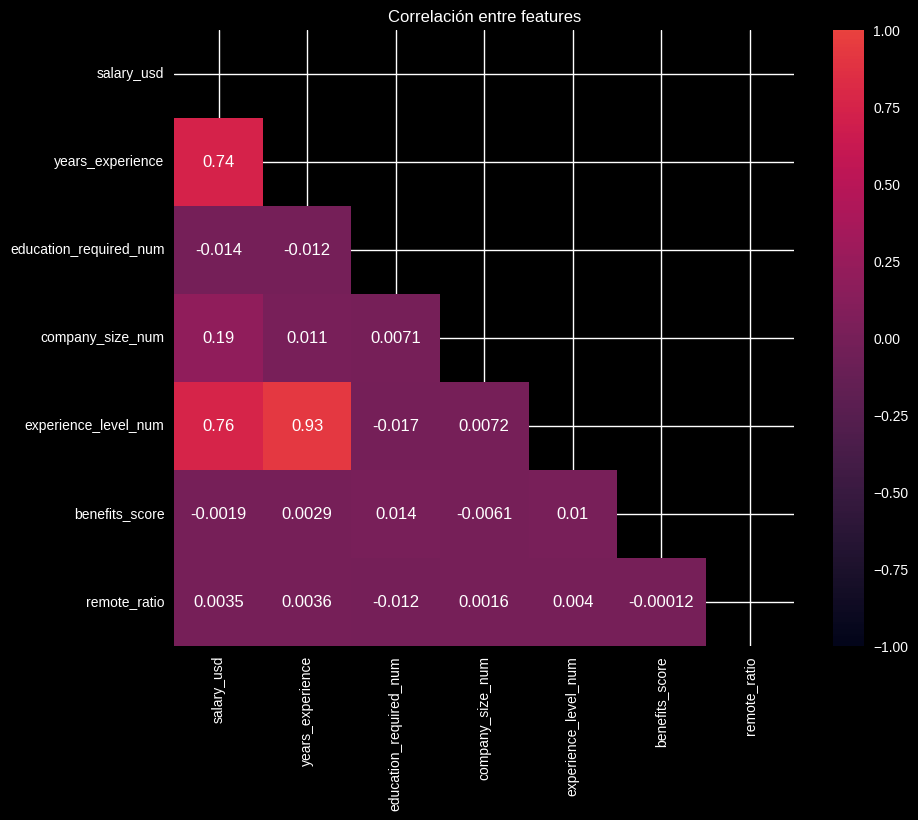

In [84]:
correlation_cols = [
    'salary_usd',
    'years_experience',
    'education_required_num',
    'company_size_num',
    'experience_level_num',
    'benefits_score',
    'remote_ratio'
]

# Calculate the correlation matrix
correlation_matrix = jobs_market_AM_reduced[correlation_cols].corr()

plt.figure(figsize=(10,8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=np.bool_))

sns.heatmap(correlation_matrix,
            mask = mask,
            vmin = -1,
            vmax = 1,
            annot=True,
            center=.65,
            cmap='rocket'
           )
plt.title("Correlación entre features")
plt.style.use('dark_background')
plt.show()

# Modelos

Nota: Yo creo nuestra mejor opcion va a ser usar un RandomForest por la correlacion tan bajita que tenemos. Un LinearRegression depronto nos da un valor malo, eso lo confirmo con el ejercicio de la clase.

### Definición de modelos

In [85]:
jobs_market_numerical = jobs_market_AM_reduced.copy()

In [86]:
# Use estos campos para monitorear las columnas y filtrar las que no aportan en la regresión.
jobs_market_numerical.columns

Index(['salary_usd', 'experience_level', 'employment_type', 'company_location',
       'company_size', 'remote_ratio', 'education_required',
       'years_experience', 'industry', 'benefits_score',
       'education_required_num', 'company_size_num', 'experience_level_num',
       'job_group'],
      dtype='object')

In [87]:
jobs_market_copy_1 = jobs_market_copy.copy()

In [88]:
# Variables independientes y dependiente

X = jobs_market_copy_1[['experience_level', 'employment_type', 'company_location',
                      'company_size', 'remote_ratio', 'education_required',
                      'years_experience', 'industry']]

y = jobs_market_copy_1['salary_usd']

# Separar datos

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Preprocesamiento: OneHot para variables categóricas

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ],
    remainder='passthrough'
)


# Definir modelos

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
}

# Dictionary to store predictions
results = {}

# Entrenar, predecir y evaluar cada modelo

for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Store predictions
    results[name] = y_pred

    print(f'-'*55)
    print(f'Model: {name}')
    print(f'R²: {r2_score(y_test, y_pred):.3%}')
    print(f'MAE: {mean_absolute_error(y_test, y_pred):.0f}')
    print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.0f}')
    print(f'-'*55)

-------------------------------------------------------
Model: Linear Regression
R²: 85.289%
MAE: 17865
RMSE: 24280
-------------------------------------------------------
-------------------------------------------------------
Model: Decision Tree
R²: 77.372%
MAE: 20424
RMSE: 30113
-------------------------------------------------------
-------------------------------------------------------
Model: Random Forest
R²: 86.819%
MAE: 16116
RMSE: 22982
-------------------------------------------------------
-------------------------------------------------------
Model: XGBoost
R²: 86.771%
MAE: 16122
RMSE: 23025
-------------------------------------------------------


### Pruebas y predicciones

1. **Prueba con un registro del dataset**

In [89]:
# @markdown ## Ingrese los datos para la predicción:
experience_level = 'MI' # @param ["EN", "MI", "SE", "EX"] {allow-input: true}
employment_type = 'Freelance' # @param ["Full-time", "Contract", "Part-time", "Freelance"] {allow-input: true}
company_location = 'Ireland' # @param ['Sweden', 'Japan', 'Germany', 'Finland', 'France', 'Singapore','Canada', 'Australia', 'United Kingdom', 'Denmark','United States', 'Norway', 'India', 'Switzerland', 'Netherlands','Ireland', 'Austria', 'China', 'Israel', 'South Korea'] {allow-input: true}
company_size = 'M' # @param ["S", "M", "L"] {allow-input: true}
remote_ratio = "50" # @param [0, 50, 100] {allow-input: true}
education_required = 'PhD' # @param ["Associate", "Bachelor", "Master", "PhD"] {allow-input: true}
years_experience = 2 # @param {type:"number"}
industry = 'Media' # @param ['Transportation', 'Automotive', 'Finance', 'Technology', 'Gaming', 'Consulting', 'Government', 'Telecommunications', 'Healthcare', 'Education', 'Energy', 'Real Estate', 'Media', 'Retail','Manufacturing'] {allow-input: true}

# Create a DataFrame from the input data
input_data = pd.DataFrame({
    'experience_level': [experience_level],
    'employment_type': [employment_type],
    'company_location': [company_location],
    'company_size': [company_size],
    'remote_ratio': [remote_ratio],
    'education_required': [education_required],
    'years_experience': [years_experience],
    'industry': [industry]
})
# Apply the preprocessor to the input data
input_data_processed = preprocessor.transform(input_data)

print("Predicciones de salario (USD):")

# Iterate through each model and make a prediction
for name, model in models.items():
    # Make the prediction using the trained regressor model
    predicted_salary = model.predict(input_data_processed)
    print(f"- {name}: {predicted_salary[0]:.2f}")

#---------------------------------------------------------------------------

# Extraer las predicciones a una lista para tomarle el promedio a los valores
predictions = []
for name, model in models.items():
    predicted_salary = model.predict(input_data_processed)
    predictions.append(predicted_salary[0])

# Encontrar las predicciones más grandes usando heapq
top_3_predictions = heapq.nlargest(3, predictions)
average_top_3 = sum(top_3_predictions) / 3

print("\n","-"*55, "\n")
print(f"Promedio de las 3 predicciones más altas: {average_top_3:.2f} USD")

Predicciones de salario (USD):
- Linear Regression: 92107.70
- Decision Tree: 102340.00
- Random Forest: 92538.17
- XGBoost: 89223.54

 ------------------------------------------------------- 

Promedio de las 3 predicciones más altas: 95661.96 USD


In [90]:
print(jobs_market_AM_reduced.loc[12333])

salary_usd                     112203
experience_level                   MI
employment_type                    FL
company_location              Ireland
company_size                        L
remote_ratio                       50
education_required                PhD
years_experience                    2
industry                        Media
benefits_score                    8.6
education_required_num              4
company_size_num                    3
experience_level_num                2
job_group                 ML Engineer
Name: 12333, dtype: object


# Experimenta con el modelo

In [91]:
# @markdown ## Ingrese los datos para la predicción:
experience_level = 'EN' # @param ["EN", "MI", "SE", "EX"] {allow-input: true}
employment_type = 'Part-time' # @param ["Full-time", "Contract", "Part-time", "Freelance"] {allow-input: true}
company_location = 'India' # @param ['Sweden', 'Japan', 'Germany', 'Finland', 'France', 'Singapore','Canada', 'Australia', 'United Kingdom', 'Denmark','United States', 'Norway', 'India', 'Switzerland', 'Netherlands','Ireland', 'Austria', 'China', 'Israel', 'South Korea'] {allow-input: true}
company_size = 'S' # @param ["S", "M", "L"] {allow-input: true}
remote_ratio = "50" # @param [0, 50, 100] {allow-input: true}
education_required = 'Bachelor' # @param ["Associate", "Bachelor", "Master", "PhD"] {allow-input: true}
years_experience = 2 # @param {type:"number"}
industry = 'Technology' # @param ['Transportation', 'Automotive', 'Finance', 'Technology', 'Gaming', 'Consulting', 'Government', 'Telecommunications', 'Healthcare', 'Education', 'Energy', 'Real Estate', 'Media', 'Retail','Manufacturing'] {allow-input: true}

# Create a DataFrame from the input data
input_data = pd.DataFrame({
    'experience_level': [experience_level],
    'employment_type': [employment_type],
    'company_location': [company_location],
    'company_size': [company_size],
    'remote_ratio': [remote_ratio],
    'education_required': [education_required],
    'years_experience': [years_experience],
    'industry': [industry]
})
# Apply the preprocessor to the input data
input_data_processed = preprocessor.transform(input_data)

print("Predicciones de salario (USD):")

# Iterate through each model and make a prediction
for name, model in models.items():
    # Make the prediction using the trained regressor model
    predicted_salary = model.predict(input_data_processed)
    print(f"- {name}: {predicted_salary[0]:.2f}")

#---------------------------------------------------------------------------

# Extraer las predicciones a una lista para tomarle el promedio a los valores
predictions = []
for name, model in models.items():
    predicted_salary = model.predict(input_data_processed)
    predictions.append(predicted_salary[0])

# Encontrar las predicciones más grandes usando heapq
top_3_predictions = heapq.nlargest(3, predictions)
average_top_3 = sum(top_3_predictions) / 3

print("\n-----------------------------")
print(f"Promedio de las 3 predicciones más altas: {average_top_3:.2f} USD")

Predicciones de salario (USD):
- Linear Regression: -22186.01
- Decision Tree: 17942.00
- Random Forest: 24054.37
- XGBoost: 19371.90

-----------------------------
Promedio de las 3 predicciones más altas: 20456.09 USD


# Estadísticas de resultados

In [92]:
y_true = y_pred.copy()

## Medida de ajuste modelos R^2

In [93]:
r2_scores = []
for name, y_pred in results.items():
    r2 = r2_score(y_test, y_pred)
    r2_scores.append({"Modelo": name, "R²": r2})

df_r2 = pd.DataFrame(r2_scores)

# Gráfico de barras simple
fig = px.bar(
    df_r2,
    x="Modelo",
    y="R²",
    text="R²",
    title="Comparativa de R² por Modelo",
    template="plotly_dark",
    labels={"R²": "Coeficiente de Determinación R²"}
)
fig.update_traces(texttemplate='%{text:.2%}', textposition='outside')
fig.show()

## MAE y RMSE por modelo

In [94]:
# Calcular métricas por modelo
metrics = []
for name, y_pred in results.items():
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    metrics.append({"Modelo": name, "Métrica": "MAE", "Valor": mae})
    metrics.append({"Modelo": name, "Métrica": "RMSE", "Valor": rmse})

df_metrics = pd.DataFrame(metrics)

fig = px.bar(
    df_metrics,
    x="Modelo",
    y="Valor",
    color="Métrica",
    barmode="group",
    template="plotly_dark",
    title="Comparativa MAE y RMSE por modelo",
    text="Valor",
    labels={"Valor":"Valor de la métrica"}
)
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.show()

## XGBoost líneas: real - estimado

In [95]:
df_simple = pd.DataFrame({
    "Real": y_test,
    "Predicho": results["XGBoost"]
}).sort_values("Real").reset_index(drop=True)

df_simple = df_simple.melt(var_name="Tipo", value_name="Salario", ignore_index=False)
df_simple["Muestra"] = df_simple.index

fig = px.line(
    df_simple,
    x="Muestra",
    y="Salario",
    color="Tipo",
    template="plotly_dark",
    title="Comparativa de salario real vs. predicho",
    labels={"Muestra":"Registro de muestra", "Salario":"Salario"}
)
fig.show()

## Random Forest: real - estimado

In [96]:
df_rndm_frst = pd.DataFrame({
    "Muestra": list(range(len(y_true))) * 2,
    "Salario": list(y_true) + list(results["Random Forest"]),
    "Tipo": ["Real"]*len(y_true) + ["Predicho"]*len(y_true)
})

df_rndm_frst_positive = df_rndm_frst[df_rndm_frst['Salario'] >= 0].copy()

fig = px.line(
    df_rndm_frst_positive, x="Muestra", y="Salario", color="Tipo",
    template="plotly_dark",
    title="Random Forest: Salario real vs. salario estimado",
    labels={"Muestra":"Registro de muestra", "Salario":"Salario"},
    markers=True
)
fig.show()

## Linear Regression: real - estimado

In [97]:
df_XGBoost = pd.DataFrame({
    "Muestra": list(range(len(y_test))) * 2,
    "Salario": list(y_test) + list(results["XGBoost"]),
    "Tipo": ["Real"]*len(y_test) + ["Predicho"]*len(y_test)
})

df_XGBoost_positive = df_XGBoost[df_XGBoost['Salario'] >= 0].copy()

fig = px.line(
    df_XGBoost_positive, x="Muestra", y="Salario", color="Tipo",
    template="plotly_dark",
    title="XGBoost: Salario real vs. salario estimado",
    labels={"Muestra":"Registro de muestra", "Salario":"Salario"},
    markers=True
)
fig.show()